## 23. Classification

### 23.1 Introduction

The problem of predicting a discrete variable $Y$ from another random variable $X$ is called **classfication**, **supervised learning**, **discrimination** or **pattern recognition**.

In more detail, consider IID data $(X_1, Y_1), \dots, (X_n, Y_n)$ where

$$ X_i = (X_{i1}, \dots, X_{id}) \in \mathcal{X} \subset \mathbb{R}^d $$

is a $d$-dimensional vector and $Y_i$ takes values in some finite set $\mathcal{Y}$.  A **classification rule** is a function $h : \mathcal{X} \rightarrow \mathcal{Y} $.  When we observe a new $X$, we predict $Y$ to be $h(X)$.

It is worth revisiting the vocabulary:

| Statistics     | Computer Science    | Meaning                                      |
|----------------|---------------------|----------------------------------------------|
| classification | supervised learning | predicting a discrete $Y$ from $X$           |
| data           | training sample     | $(X_1, Y_1), \dots, (X_n, Y_n)$              |
| covariates     | features            | the $X_i$'s                                  |
| classifier     | hypothesis          | map $h: \mathcal{X} \rightarrow \mathcal{Y}$ |
| estimation     | learning            | finding a good classifier                    |

In most cases with this chapter, we deal with the case $\mathcal{Y} = \{ 0, 1 \}$.

### 23.2 Error Rates and The Bayes Classifier

The **true error rate** of a classifier is 

$$ L(h) = \mathbb{P}( \{ h(X) \neq Y\} ) $$

and the **empirical error rate** or **training error rate** is

$$ \hat{L}_n(h) = \frac{1}{n} \sum_{i=1}^n I(h(X_i) \neq Y_i) $$

Consider the special case where $\mathcal{Y} = \{0, 1\}$.  Let

$$ r(x) = \frac{\pi f_1(x)}{\pi f_1(x) + (1 - \pi) f_0(x)} $$

where

$$ f_0(x) = f(x | Y = 0)
\quad \text{and} \quad
f_1(x) = f(x | Y = 1)$$

and $\pi = \mathbb{P}(Y = 1)$.

The **Bayes classification rule** $h^*$ is defined to be

$$
h^*(x) = \begin{cases}
1 & \text{if } r(x) > \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

The set $\mathcal{D}(h) = \{ x : \mathbb{P}(Y = 1 | X = x) = \mathbb{P}(Y = 0 | X = x) \}$ is called the **decision boundary**.

**Warning**: the Bayes rule has nothing to do with Bayesian inference.  We could estimate the Bayes rule using either frequentist or Bayesian methods.

The Bayes rule may be written in several different forms:

$$
h^*(x) = \begin{cases}
1 & \text{if } \mathbb{P}(Y = 1 | X = x) > \mathbb{P}(Y = 0 | X  = x)\\
0 & \text{otherwise}
\end{cases}
$$

and

$$
h^*(x) = \begin{cases}
1 & \text{if } \pi f_1(x) > (1 - \pi) f_0(x) \\
0 & \text{otherwise}
\end{cases}
$$

**Theorem 23.5**.  The Bayes rule is optimal, that is, if $h$ is any classification rule then $L(h^*) \leq L(h)$.

The Bayes rule depends on unknown quantities so we need to use the data to find some approximation to the Bayes rule.  At the risk of oversimplifying, there are three main approaches:

1. **Empirical Risk Maximization**.  Choose a set of classifiers $\mathcal{H}$ and find $\hat{h} \in \mathcal{H}$ that minimizes some estimate of $L(h)$.

2. **Regression**.  Find an estimate $\hat{r}$ of the regression function $r$ and define

$$ 
\hat{h}(x) = \begin{cases}
1 & \text{if } \hat{r} > \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

3. **Density Estimation**.  Estimate $f_0$ from the $X_i$'s for which $Y_i = 0$, estimate $f_1$ from the $X_i$'s for which $Y_i = 1$, and let $\hat{\pi} = n^{-1} \sum_{i=1}^n Y_i$.  Define

$$ \hat{r}(x) = \hat{\mathbb{P}}(Y = 1 | X = x) = \frac{\hat{\pi} \hat{f}_1(x)}{\hat{\pi} \hat{f}_1(x) + (1 - \hat{\pi}) \hat{f}_0(x)} $$

and

$$ 
\hat{h}(x) = \begin{cases}
1 & \text{if } \hat{r} > \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

Now to generalize to the case where $Y$ takes more than two values:

**Theorem 23.6**.  Suppose that $Y \in \mathcal{Y} = \{ 1, \dots, K \}$.  The optimal rule is

$$ h(x) = \text{argmax}_h \mathbb{P}(Y = k | X = x) = \text{argmax}_h \pi_k f_k(x) $$

where

$$ \mathbb{P}(Y = k | X = x) = \frac{f_k(x) \pi_k}{\sum_r f_r(x) \pi_r} $$

and $ \pi_r = \mathbb{P}(Y = r)$, $f_r(x) = f(x | Y = r)$.

### 23.3 Gaussian and Linear Classifiers

Perhaps the simplest approach to classification is to use the density estimation strategy and assume a parametric model for the densities.  Suppose that $\mathcal{Y} = \{ 0, 1 \}$ and that $f_0(x) = f(x | Y = 0)$ and $f_1(x) = f(x | Y = 1)$ are both multivariate Gaussians:

$$ f_k(x) = \frac{1}{(2\pi)^{d/2} | \Sigma_k |^{1/2}} \exp \left\{ -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right\}, \quad k = 0, 1$$

Thus, $X | Y = 0 \sim N(\mu_0, \Sigma_0)$ and $X | Y = 1 \sim N(\mu_1, \Sigma_1)$.

**Theorem 23.7**.  If $X | Y = 0 \sim N(\mu_0, \Sigma_0)$ and $X | Y = 1 \sim N(\mu_1, \Sigma_1)$, then the Bayes rule is

$$
h^*(x) = \begin{cases}
1 & \text{if } r_1^2 < r_0^2 + 2 \log \left( \frac{\pi_1}{\pi_0} \right) + \log \left( \frac{| \Sigma_0 | }{ | \Sigma_1| }
\right) \\
0 & \text{otherwise} 
\end{cases}
$$

where

$$ r_i^2 = (x - \mu_i)^T \Sigma_i^{-1}(x - \mu_i), \quad i = 1, 2 $$

is the **Manalahobis distance**.  An equivalent way of expressing Bayes' rule is 

$$ h(x) = \text{argmax}_k \delta_k(x) $$

where

$$ \delta_k(x) = -\frac{1}{2} \log | \Sigma_k | - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k $$

and $|A|$ denotes the determinant of matrix $A$.

The decision boundary of the above classifier is quadratic so this procedure is often called **quadratic discriminant analysis (QDA)**.  In practice, we use sample estimates of $\pi, \mu_0, \mu_1, \Sigma_0, \Sigma_1$ in place of the true value, namely:

$$
\begin{array}{cc}
\hat{\pi}_0 = \frac{1}{n} \sum_{i=1}^n (1 - Y_i) & \hat{\pi}_1 = \frac{1}{n} \sum_{i=1}^n Y_i \\
\hat{\mu}_0 = \frac{1}{n_0} \sum_{i: Y_i = 0} X_i & \hat{\mu}_1 = \frac{1}{n_0} \sum_{i: Y_i = 1} X_i \\
S_0 = \frac{1}{n_0} \sum_{i: Y_i = 0} (X_i - \hat{\mu}_0) (X_i - \hat{\mu}_0)^T & 
S_1 = \frac{1}{n_1} \sum_{i: Y_i = 1} (X_i - \hat{\mu}_1) (X_i - \hat{\mu}_1)^T
\end{array}
$$

where $n_0 = \sum_i (1 - Y_i)$ and $n_1 = \sum_i Y_i$ are the number of $Y_i$ variables equal to 0 or 1, respectively.

A simplification occurs if we assume $\Sigma_0 = \Sigma_1 = \Sigma$.  In that case, the Bayes rule is

$$ h(x) = \text{argmax}_k \delta_k(x) $$

where now

$$ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k $$

The parameters are estimated as before, except the MLE of $\Sigma$ now is

$$ S = \frac{n_0 S_0 + n_1 S_1}{n_0 + n_1} $$

The classification rule is

$$
h^*(x) = \begin{cases}
1 &\text{if } \delta_1(x) > \delta_0(x) \\
0 &\text{otherwise}
\end{cases}
$$

where

$$ \delta_j(x) = x^T S \hat{\mu}_j - \frac{1}{2} \hat{\mu}_j^T S^{-1} \hat{\mu}_j + \log \hat{\pi}_j $$

is called the **discriminant function**.  The decision boundary $ \{ x : \delta_0(x) = \delta_1(x) \}$ is linear so this method is called **linear discrimination analysis (LDA)**.

Now we generalize to the case where $Y$ takes on more than two values.

**Theorem 23.9**.  Suppose that $Y \in \{ 1, \dots, K \}$.  If $f_k(x) = f(x | Y = k)$ is Gaussian, the Bayes rule is

$$ h(x) = \text{argmax}_k \delta_k(x) $$

where

$$ \delta_k(x) = -\frac{1}{2} \log | \Sigma_k | - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k $$

If the variances of the Gaussians are equal then

$$ \delta_k(x) = x^T \Sigma_{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k $$

We estimate $\delta_k(x)$ by inserting estimates of $\mu_k$, $\Sigma_k$, and $\pi_k$.

There is another version of LDA due to Fisher.  The idea is to first reduce the dimension of the covariates to one dimension by projecting the data onto a line.  Algebraically, this means replacing the covariate $X = (X_1, \dots, X_d)$ with a linear combination $U = w^T X = \sum_{j=1}^d w_j X_j$.  The goal is to choose the vector $w = (w_1, \dots, w_d)$ that "best separates the data".  Then we perform classification with the new covariate $U$ instead of $X$.

We need to define what we mean by separation of the groups.  We would like the two groups to have means that are far apart relative to their spread.  Let $\mu_j$ denote the mean of $X$ for $Y = j$ and let $\Sigma$ be the variance matrix of $X$.  Then $\mathbb{E}(U | Y = j) = \mathbb{E}(w^T X | Y = j) = w^T \mu_j$ and $\mathbb{V}(U) = w^T \Sigma w$.  Define the separation by

$$
\begin{align}
J(w) &= \frac{(\mathbb{E}(U | Y = 0) - \mathbb{E}(U | Y = 1))^2}{w^T \Sigma w} \\
&= \frac{(w^T \mu_0 - w^T \mu_1)^2}{w^T \Sigma w} \\
&= \frac{w^T (\mu_0 - \mu_1)(\mu_0 - \mu_1)^T w}{w^T \Sigma w}
\end{align}
$$

*The quantity $J$ arises in physics, where it is called the Rayleight coefficient.*

We estimate $J$ as follows.  Let $n_j = \sum_{i=1}^n I(Y_i = j)$ be the number of observations in group $j$, let $\overline{X}_j = n_j^{-1} \sum_{i: Y_i = j} X_j$ be the sample mean vetor of $X$'s for group $j$, and let $S_j = (n_j - 1)^{-1} \sum_{i: Y_i = j} (X_i - \overline{X}_j)(X_i - \overline{X}_j)^T $ be the sample covariance matrix in group $j$.  Define

$$ \hat{J}(w) = \frac{w^T S_B w}{w^T S_W w} $$

where

$$ 
S_B = (\overline{X}_0 - \overline{X}_1) (\overline{X}_0 - \overline{X}_1)^T
\quad \text{and} \quad
S_W = \frac{(n_0 - 1) S_0 + (n_1 - 1) S_1}{(n_0 - 1) + (n_1 -1)}
$$

**Theorem 23.10**.  The vector

$$ w = S_W^{-1}(\overline{X}_0 - \overline{X}_1) $$

is a minimizer of $\hat{J}(w)$.  We call

$$ U = w^T X = (\overline{X}_0 - \overline{X}_1)^T S_W^{-1} X $$

the **Fisher linear discriminant function**.  The midpoint $m$ between $\overline{X}_0$ and $\overline{X}_1$ is

$$ m = \frac{1}{2} (\overline{X}_0 + \overline{X}_1) = \frac{1}{2}  (\overline{X}_0 - \overline{X}_1)^T S_B^{-1}  (\overline{X}_0 + \overline{X}_1)$$

Fisher's classification rule is

$$
h(x) = \begin{cases}
0 & \text{if } w^T X \geq m \\
1 & \text{if } w^T X < m
\end{cases}
= \begin{cases}
0 & \text{if } (\overline{X}_0 - \overline{X}_1)^T S_W^{-1}x \geq m \\
1 & \text{if } (\overline{X}_0 - \overline{X}_1)^T S_W^{-1}x < m
\end{cases}
$$

Fisher's rule is the same as the Bayes linear classifier when $\hat{\pi} = 1/2$.

### 23.4 Linear Regression and Logistic Regression

A more direct approach to classification is to estimate the regression function $r(x) = \mathbb{E}(Y | X = x)$ without bothering to estimate the densities $f_k$.  For the rest of this section we will only consider the case where $\mathcal{Y} = \{ 0, 1 \}$.  Thus, $r(x) = \mathbb{P}(Y = 1 | X = x)$ and once we have an estimate $\hat{r}$, we will use the classification rule

$$ 
h(x) = \begin{cases}
1 &\text{if } \hat{r}(x) > \frac{1}{2} \\
0 &\text{otherwise}
\end{cases} 
$$

The simplest regression is the linear regression model

$$ Y = r(x) + \epsilon = \beta_0 + \sum_{j=1}^d \beta_j X_j + \epsilon $$

where $\mathbb{E}(\epsilon) = 0$.  This model can't be correct since it doesn't force $Y \in \mathcal{Y}$.  Nonetheless, it can sometimes lead to a decent classifier.

Recall that the least square estimate of $\beta = (\beta_0, \beta_1, \dots, \beta_d)^T$ minimizes the residual sum of squares

$$ \text{RSS}(\beta) = \sum_{i=1}^n \left( Y_i - \left( \beta_0  + \sum_{j=1}^d X_{ij} \beta_j \right) \right)^2 $$

Briefly reviewing this estimator:  let

$$ 
X = \begin{bmatrix}
1 & X_{11} & \cdots & X_{1d} \\
1 & X_{21} & \cdots & X_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & \cdots & X_{nd}
\end{bmatrix}
\quad \text{and} \quad
Y = (Y_1, \dots, Y_n)^T
$$

Then,

$$ \text{RSS}(\beta) = (Y - X \beta)^T (Y - X \beta) $$

and the model can be written as

$$ Y = X \beta + \epsilon $$

where $ \epsilon = (\epsilon_1, \dots, \epsilon_n)^T$.  The least squares solution $\hat{\beta}$ that minimizes RSS is given by

$$ \hat{\beta} = (X^T X)^{-1} X^T Y $$

and the predicted values are

$$ \hat{Y} = X \hat{\beta} $$

Now we can use $h(x)$ to classify, by taking $\hat{r}(x) = \hat{\beta}_0 + \sum_k \hat{\beta}_k x_j$.

It seems sensible to use a regression model that takes into account that $Y \in \{ 0, 1 \}$.  The most common method for doing so is **logistic regression**.  Recall that the model is

$$ r(x) = \mathbb{P}(Y = 1 | X = x) = \frac{\exp \left\{ \beta_0 + \sum_j \beta_j x_j \right\} }{1 + \exp \left\{ \beta_0 + \sum_j \beta_j x_j \right\} } $$

We may write this as

$$ \text{logit} \; \mathbb{P}(Y = 1 | X = x) = \beta_0 + \sum_j \beta_j x_j $$

where $\text{logit}(a) = \log (a / (1 - a))$.  Under this model, each $Y_i$ is a Bernoulli with success probability

$$ p_i(\beta) = \frac{\exp \left\{ \beta_0 + \sum_j \beta_j X_{ij} \right\} }{1 + \exp \left\{ \beta_0 + \sum_j \beta_j X_{ij} \right\} } $$

The likelihood function for the data set is

$$ \mathcal{L}(\beta) = \prod_{i=1}^n p_i(\beta)^{Y_i} (1 - p_i(\beta))^{1 - Y_i}$$

We obtain the MLE numerically.

We can get a better classifier by fitting a richer model.  For example we could fit

$$ \text{logit} \; \mathbb{P}(Y = 1 | X = x) = \beta_0 + \sum_j \beta_j x_j + \sum_{j, k} \beta_{jk} x_j x_k $$

More generally, we could add terms of up to order $r$ for some integer $r$.  Large values of $r$ give a more complicated model which should fit the data better.  But there is a bias-variance tradeoff which we'll discuss later.

The logistic regression can be easily extend to $k$ groups but we shall not give the details here.

*(Student note: multiple treatments are easily found searching for "multinomial logistic regression")*

### 23.5  Relationship Between Logistic Regression and LDA

LDA and logistic regression are almost the same thing.  

If we assume each group is Gaussian with the same covariance matrix then

$$ 
\begin{align}
\log \left( \frac{\mathbb{P}(Y = 1 | X = x)}{\mathbb{P}(Y = 0 | X = x)} \right) 
&= \log \left( \frac{\pi_0}{\pi_1} \right) - \frac{1}{2} (\mu_0 + \mu_1)^T \Sigma^{-1} (\mu_1 - \mu_0) + x^T \Sigma^{-1}( \mu_1 - \mu_0) \\
&\equiv \alpha_0 + \alpha^T x
\end{align}
$$

On the other hand, the logistic model is, by assumption,

$$ \log \left( \frac{\mathbb{P}(Y = 1 | X = x)}{\mathbb{P}(Y = 0 | X = x)} \right) = \beta_0 + \beta^T x $$

These are the same model since they both lead to classification rules that are linear in $x$.  The difference is in how we estimate the parameters.

The joint density of a single observation is $f(x, y) = f(x | y) f(y) = f(y | x) f(x)$.  In LDA we estimated the whole distribution by estimating $f(x | y)$ and $f(y)$; specifically, we estimated $f_k(x) = f(x | Y = k)$, $\pi_k = f_Y(k)$.  We maximized the likelihood

$$ \prod_i f(x_i, y_i) = \underbrace{\prod_i f(x_i | y_i)}_\text{Gaussian} \underbrace{ \prod_i f(y_i) }_\text{Bernoulli}$$

In logistic regression, we maximized the conditional likelihood $\prod_i f(y_i | x_i)$ but we ignored the second term $f(x_i)$:

$$ \prod_i f(x_i, y_i) = \underbrace{\prod_i f(y_i | x_i)}_\text{logistic} \underbrace{ \prod_i f(x_i) }_\text{ignored}$$


Since classification requires only knowing $f(y | x)$, we don't really need to estimate the whole joint distribution.  Logistic regression leaves the marginal distribution $f(x)$ unspecified so it is more nonparametric than LDA.

To summarize:  LDA and logistic regression both lead to a linear classification rule.  In LDA we estimate the whole joint distribution $f(x, y) = f(x | y) f(y)$.  In logistic regression we only estimate $f(y | x)$ and we don't bother estimating $f(x)$.

### 23.6 Density Estimation and Naive Bayes

Recall that the Bayes rule is $h(x) = \text{argmax}_k \pi_k f_k(x)$.  If we can estimate $\pi_k$ and $f_k$ then we can estimate the Bayes classification rule.  Estimating $\pi_k$ is easy, but what about $f_k$? We did it previously by assuming $f_k$ was Gaussian.  Another strategy is to estimate $f_k$ with some nonparametric density estimator $\hat{f}_k$ such as a kernel estimator.  But if $x = (x_1, \dots, x_d)$ is high dimensional, nonparametric density estimation is not very reliable.  The problem is ameliorated if we assume that $X_1, \dots, X_d$ are independent, for then $f_k(x_1, \dots, x_d) = \prod_{j=1}^d f_{kj}(x_j)$.  This reduces the problem to $d$ one-dimensional density estimation problems, within each of the $k$ groups.  The resulting classifier is called the **naive Bayes classifier**.  The assumption that the components of $X$ are independent is usually wrong yet the resulting classifier might still be accurate.

**Naive Bayes Classifier**

1.  For each group $k$, compute an estimate $\hat{f}_{kj}$ of the density $f_{kj}$ for $X_j$, using the data for which $Y_i = k$.

2.  Let

$$ \hat{f}_k(x) = \hat{f}_k(x_1, \dots, x_d) = \prod_{j=1}^d \hat{f}_{kj}(x_j) $$

3. Let

$$ \hat{\pi}_k = \frac{1}{n} \sum_{i=1}^n I(Y_i = k) $$

where $I(t) = 1$ if $t$ and $I(t) = 0$ otherwise.

4. Let

$$ h(x) = \text{argmax}_k \hat{\pi}_k \hat{f}_k(x) $$

The naive Bayes classifier is especially popular when $x$ is high dimensional and discrete.  In that case, $\hat{f}_{kj}(x_k)$ is especially simple.

### 23.7 Trees

Trees are classification methods that partition the covariate space $\mathcal{X}$ into disjoint pieces and then classify the observations according to which partition element they fall in.  As the name implies, the classifier can be represented as a tree.

Here is how a tree is constructed.  For simplicity, we focus on the case where $\mathcal{Y} = \{ 0, 1 \}$.  First, suppose there is a single covariate $X$.  We choose a split point $t$ that divides the real line into two sets, $A_1 = (-\infty, t]$ and $A_2 = (t, \infty)$.  Let $\hat{p}_s(j)$ be the proportion of observations in $A_s$ such that $Y_i = j$:

$$ \hat{p}_s(j) = \frac{\sum_{i=1}^n I(Y_i = j, X_i \in A_s)}{\sum_{i=1}^n I(X_i \in A_s)} $$

for $s = 1, 2$ and $j = 0, 1$.  The **impurity** of the split $t$ is defined to be

$$ I(t) = \sum_{s=1}^2 \gamma_s $$

where

$$ \gamma_s = 1 - \sum_{j=0}^1 \hat{p}_s(j)^2 $$

This measure of impurity is known as the **Gini index**.  If a partition element $A_s$ contains all 0s or all 1s, then $\gamma_s = 0$.  Otherwise, $\gamma_s > 0$.  We choose the split point $t$ to minimize the impurity.  (Other indices of impurity may be used besides the Gini index.)

When there are several covariates, we choose whatever covariate and split that leads to the lowest impurity.  This process is continued until some stopping criteria is met.  For example, we might stop when every partition element has fewer than $n_0$ data points, where $n_0$ is some fixed number.  The bottom nodes of the tree are called **leaves**.  Each leaf is assigned a 0 or 1 depending on whether there are more data points with $Y = 0$ or $Y = 1$ in the partition element.

This procedure is easily generalized to the multiclass case, $\mathcal{Y} = \{ 1, \dots, K \}$.  We simply define the impurity by

$$ \gamma_s = 1 - \sum_{j=1}^K \hat{p}_s(j)^2 $$

where $\hat{p}_s(j)$ is the proportion of observations in the partition element for which $Y = j$.

Our description of how to build trees is incomplete.  If we keep splitting until there are few cases in each leaf of the tree, we are likely to overfit the data.  We should choose the complexity of the tree in such a way that the estimated true error rate is low.  In the next section, we discuss estimation of the error rate.

### 23.8 Assessing Error Rates and Choosing a Good Classifier

We would like to have a classifier $h$ with a low true error rate $L(h)$.  Usually, we can't use the training error rate $\hat{L}_n(h)$ as an estimate of the true error rate because it is biased downward.

There are many ways to estimate the error rate.  We'll consider two:  **cross-validation** and **probability inequalities**.

#### Cross-validation

The basic idea of cross-validation is to leave out some of the data when fitting a model.  The simplest version involves randomly splitting the data into two pieces: the **training set $\mathcal{T}$** and the **validation set $\mathcal{V}$**.  Often, about 10 percent of the data might be set aside as the validation set.  The classifier $h$ is constructed from the training set.  We then estimate the error by

$$ \hat{L}(h) = \frac{1}{m} \sum_{X_i \in \mathcal{V}} I(h(X_i) \neq Y_i) $$

where $m$ is the size of the validation set.

Another approach to cross-validation is **K-fold cross-validation** which is obtained as follows:

**K-fold cross-validation**

1.  Randomly divide the data into $K$ chunks of approximately equal size.  A common choice is $K = 10$.

2.  For $k = 1$ to $K$ do the following:

   (a) Delete chunk $k$ from the data.
   
   (b) Compute the classifier $\hat{h}_{(k)}$ from the rest of the data.
   
   (c) Use $\hat{h}_{(k)}$ to predict the data in chunk $k$.  Let $\hat{L}_{(k)}$ denote the observed error rate.
   
3. Let

$$ \hat{L}(h) = \frac{1}{K} \sum_{k=1}^K \hat{L}_{(k)} $$

Cross-validation can be applied to any classification method.  To apply it to trees, one begins by fitting an initial tree.  Smaller trees are obtained by pruning tree.  We can do this for trees of various sizes, where size refers to the number of terminal nodes on the tree.  Cross-validation is then used to estimate error rate as a function of tree size.

#### Probability Inequalities

Another approach to estimating the error rate is to find a confidence interval for $\hat{L}_n(h)$ using probability inequalities.  This method is useful in the context of **empirical risk estimation**.

Let $\mathcal{H}$ be a set of classifiers, for example, all linear classifiers.  Empirical risk minimization means choosing the classifier $\hat{h} \in \mathcal{H}$ to minimize the training error $\hat{L}_n(h)$, also called the empirical risk.  Thus,

$$ \hat{h} = \text{argmin}_{h \in \mathcal{H}} \hat{L}_n(h) 
= \text{argmin}_{h \in \mathcal{H}} \left( \frac{1}{n} \sum_i I(h(X_i) \neq Y_i) \right) $$

Typically, $\hat{L}_n(\hat{h})$ underestimates the true error rate $L(\hat{h})$ because $\hat{h}$ was chosen to minimize $\hat{L}_n(\hat{h})$.  Our goal is to assess how much underestimation is taking place.  Our main tool for this analysis is **Hoeffding's inequality**.  Recall that if $X_1, \dots, X_n \sim \text{Bernoulli}(p)$, then, for any $\epsilon > 0$,

$$ \mathbb{P}(|\hat{p} - p| > \epsilon) \leq 2 e^{ -2 n \epsilon^2 } $$

where $\hat{p} = n^{-1} \sum_{i=1}^n X_i$.

First, suppose that $\mathcal{H} = \{ h_1, \dots, h_m \}$ consists of finitely many classifiers.  For any fixed $h$, $\hat{L}_n(h)$ converges in almost surely to $L(h)$ by the law of large numbers.  We will now establish a stronger result.

**Theorem 23.16 (Uniform Convergence)**.  Assume $\mathcal{H}$ is finite and has $m$ elements.  Then,

$$ \mathbb{P} \left( \max_{h \in \mathcal{H}} |\hat{L}_n(h) - L(h) | > \epsilon \right) \leq 2 m e^{-2 n \epsilon^2} $$

**Proof**.  We will use Hoeffding's inequality and we will also use the fact that if $A_1, \dots, A_m$ is a set of events then $\mathbb{P}(\bigcup_{i=1}^m A_i) \leq \sum_{i=1}^m \mathbb{P}(A_i)$.  Now,

$$
\begin{align}
\mathbb{P} \left( \max_{h \in \mathcal{H}} |\hat{L}_n(h) - L(h) | > \epsilon \right)
&= \mathbb{P} \left( \bigcup_{h \in \mathcal{H}} |\hat{L}_n(h) - L(h) | > \epsilon \right) \\
& \leq \sum_{h \in \mathcal{H}} \mathbb{P} \left( |\hat{L}_n(h) - L(h) | > \epsilon \right) \\
& \leq \sum_{h \in \mathcal{H}} 2 e^{-2 n \epsilon^2} = 2 m e^{-2 n \epsilon^2}
\end{align}
$$

**Theorem 23.17**.  Let

$$ \epsilon = \sqrt{\frac{2}{n} \log \left( \frac{2m}{\alpha} \right) } $$

Then $\hat{L}_n(\hat{h}) \pm \epsilon$ is a $1 - \alpha$ confidence interval for $L(\hat{h})$.

**Proof**.  This follows from the fact that

$$
\mathbb{P}(|\hat{L}_n(\hat{h}) - L(\hat{h})| > \epsilon) 
\leq \mathbb{P}( \max_{h \in \mathcal{H}} |\hat{L}_n(h) - L(h) | > \epsilon )
\leq 2 m e^{-2 n \epsilon^2} = \alpha
$$

When $\mathcal{H}$ is large the confidence interval for $L(\hat{h})$ is large.  The more functions there are in $\mathcal{H}$ the more likely it is we have "overfit" which we compensate for by having a larger confidence interval.

In practice, we usually use sets $\mathcal{H}$ that are infinite, such as the set of linear classifiers.  To extend our analysis to these cases we want to be able to say something like

$$ \mathbb{P} \left( \sup_{h \in \mathcal{H}} |\hat{L}_n(h) - L(h) | > \epsilon \right) \leq \text{something not too big} $$

All the other results followed from this inequality.  One way to develop such a generalization is by way of the **Vapnik-Chervonenkis** or **VC dimension**.  We now consider the main ideas in VC theory.

Let $\mathcal{A}$ be a class of sets.  Given a finite set $F = \{ x_1, \dots, x_n \}$ let

$$ N_\mathcal{A}(F) = \# \Big\{ F \cap A : A \in \mathcal{A} \Big\} $$

be the number of subsets F "picked out" by $\mathcal{A}$.  Here $\#(B)$ denotes the number of elements of set $B$.  The **shatter coefficient** is defined by

$$ s(\mathcal{A}, n) = \max_{F \in \mathcal{F}_n} N_\mathcal{A}(F) $$

where $\mathcal{F}_n$ consists of all finite sets of size $n$.  Now let $X_1, \dots, X_n \sim \mathbb{P}$ and let

$$ \mathbb{P}_n(A) = \frac{1}{n} \sum_i I(X_i \in A) $$

denote the empirical probability measure.  The following remarkable theorem bounds the distance between $\mathbb{P}$ and $\mathbb{P}_n$.

**Theorem 23.18 (Vapnik and Chervonenkis (1971))**.  For any $\mathbb{P}$, $n$, and $\epsilon > 0$,

$$ \mathbb{P} \left\{ \sup_{A \in \mathcal{A}} | \mathbb{P}_n(A) - \mathbb{P}(A) | > \epsilon \right\} \leq 8 s(\mathcal{A}, n) e^{-n \epsilon^2 / 32} $$ 

The proof, though very elegant, is long and we omit it.  If $\mathcal{H}$ is a set of classifiers, define $\mathcal{A}$ to be the class of sets of the form $\{ x : h(x) = 1 \}$.  Then we define $s(\mathcal{H}, n) = s(\mathcal{A}, n)$.

**Theorem 23.19**.

$$ \mathbb{P} \left\{ \sup_{h \in \mathcal{H}} | \hat{L}_n(h) - L(h) | > \epsilon \right\} \leq 8 s(\mathcal{H}, n) e^{-n \epsilon^2 / 32} $$ 

A $1 - \alpha$ confidence interval for $L(\hat{h})$ is $\hat{L}_n(\hat{h}) \pm \epsilon_n$ where

$$ \epsilon_n^2 = \frac{32}{n} \log \left( \frac{8 s(\mathcal{H}, n)}{\alpha} \right) $$

These theorems are only useful if the shatter coefficients do not grow too quickly with $n$.  This is where the VC dimension enters.

The **VC (Vapnik-Chervonenkis) dimension** of a class of sets $\mathcal{A}$ is defined as follows.  If $s(\mathcal{A}, n) = 2^n$ for all $n$ set $\text{VC}(\mathcal{A}) = \infty$.  Otherwise, define $\text{VC}(\mathcal{A})$ to be the largest $k$ for which $s(\mathcal{A}, n) = 2^k$.

Thus, the VC-dimension is the size of the largest finite set $F$ that can be **shattered by $\mathcal{A}$**, meaning that $\mathcal{A}$ picks out each subset of $F$.  If $\mathcal{H}$ is a set of classifiers we define $\text{VC}(\mathcal{H}) = \text{VC}(\mathcal{A})$ where $\mathcal{A}$ is the class of sets of the form $\{ x : h(x) = 1 \}$ as $h$ varies in $\mathcal{H}$.  The following theorem shows that if $\mathcal{A}$ has finite VC-dimension then the shatter coefficients grow as a polynomial in $n$.

**Theorem 23.21**.  If $\mathcal{A}$ has finite VC-dimension $v$, then

$$ s(\mathcal{A}, n) \leq n^v + 1 $$

**Theorem 23.26**.  Let $x$ have dimension $d$ and let $\mathcal{H}$ be the set of linear classifiers.  The VC dimension of $\mathcal{H}$ is $d + 1$.  Hence, a $1 - \alpha$ confidence interval for the true error rate is $\hat{L}(\hat{h}) \pm \epsilon$ where

$$ \epsilon_n^2 = \frac{32}{n} \log \left( \frac{8 (n^{d + 1} + 1)}{\alpha} \right) $$

### 23.9 Support Vector Machines

In this section we consider a class of linear classifiers called **support vector machines**.  Throughout this section, we assume that $Y$ is binary.  It will be convenient to label the outcomes as $+1$ and $-1$ instead of $0$ and $1$.  A linear classifier can then be written as

$$ h(x) = \text{sign}( H(x) ) $$

where $x = (x_1, \dots, x_d)$,

$$ H(x) = a_0 + \sum_{i=1}^d a_i x_i $$

and

$$ \text{sign}(z) = \begin{cases}
-1 &\text{if } z < 0 \\
0  &\text{if } z = 0 \\
1  &\text{if } z > 0
\end{cases}$$

First, suppose that the data are **linearly separable**, that is, there exists a hyperplane that perfectly separates the two classes.

**Lemma 23.27**.  The data can be separated by some hyperplane if and only if there exists a hyperplane $H(x) = a_0 + \sum_{i=1}^d a_i x_i $ such that 

$$ Y_i H(x_i) \geq 1, \quad i = 1, \dots, n $$

**Proof**.  Suppose that the data can be separated by a hyperplane $W(x) = b_0 + \sum_{i=1}^d b_i x_i$.  It follows that there exists some constant $c$ such that $Y_i = 1$ implies$W(X_i) \geq c$ and $Y_i = -1$ implies $W(X_i) \leq -c$.  Therefore, $Y_i W(X_i) \geq c$ for all i.  Let $H(x) = a_0 + \sum_{i=1} a_i x_i$ where $a_i = b_i / c$.  Then $Y_i H(X_i) \geq 1$ for all $i$.  The reverse direction is straightforward.

In the separable case, there will be many separating hyperplanes.  Intuitively, it seems reasonable to choose the hyperplane "furthest" from the data in the sense that it separates the +1s and -1s and maximizes the distance to the closest point.  This hyperplane is called the **maximum margin hyperplane**.  The margin is the distance from the hyperplane to the nearest point.  Points on the boundary of the margin are called **support vectors**.

**Theorem 23.28**.  The hyperplane $\hat{H}(x) = \hat{a}_0 + \sum_{i=1}^d \hat{a}_i x_i$ that separates the data and maximizes the margin is given by minimizing $(1/2) \sum_{j=1}^d b_j^2$ subject to $Y_i H(x_i) \geq 1$.

It turns out that this problem can be recast as a quadratic programming problem.  Recall that $\langle X_i, X_k \rangle = X_i^T X_k$ is the inner product of $X_i$ and $X_k$.

**Theorem 23.29**.  Let $\hat{H}(x) = \hat{a}_0 + \sum_{i=1}^d \hat{a}_i x_i$ denote the optimal (largest margin) hyperplane.  Then, for $j = 1, \dots, d$,

$$ \hat{a}_j = \sum_{i=1}^n \hat{\alpha}_i Y_i X_j(i) $$

where $X_j(i)$ is the value of the covariate $X_j$ for the $i$-th data point, and $\hat{\alpha} = (\hat{\alpha}_1, \dots, \hat{\alpha}_n)$ is the vector that maximizes

$$ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \alpha_i \alpha_j Y_i Y_k \langle X_i, X_k \rangle $$

subject to

$$ \alpha_i \geq 0 $$

and

$$ 0 = \sum_i \alpha_i Y_i $$

The points $X_i$ for which $\hat{\alpha}_i \neq 0$ are called **support vectors**.  $\hat{\alpha}_0$ can be found by solving

$$ \hat{\alpha_i}(Y_i (X_i^T \hat{\alpha} + \hat{\beta}_0)) = 0$$

for any support point $X_i$.  $\hat{H}$ may be written as

$$ \hat{H}(x) = \hat{a}_0 + \sum_{i=1}^n \hat{\alpha}_i Y_i \langle x, X_i \rangle $$

There are many software packages that will solve this problem quickly.  If there is no perfect linear classifier, then one allows overlap between the groups by replacing the condition $Y_i H(x_i) \geq 1$ with

$$ Y_i H(x_i) \geq 1 - \xi_i,
\quad \xi_i \geq 0,
\quad i = 1, \dots, n
$$ 

The variables $\xi_1, \dots, \xi_n$ are called **slack variables**.

We now maximize $\sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \alpha_i \alpha_j Y_i Y_k \langle X_i, X_k \rangle$ subject to

$$ 0 \leq \xi_i \leq c, \quad i = 1, \dots, n $$

and

$$ \sum_{i=1}^n \alpha_i Y_i = 0 $$

The constant $c$ is a tuning parameter that controls the amount of overlap.

### 23.10 Kernelization

There is a trick for improving a computationally simpler classifier $h$ called **kernelization**.  The idea is to map the covariate $X$ -- which takes values in $\mathcal{X}$ -- into a higher dimensional space $\mathcal{Z}$ and apply the classifier in the bigger space $Z$.  This can yield a more flexible classifier while retaining computational complexity.

The standard example of this is illustrated in the figure below.  Let the covariate be $x = (x_1, x_2)$.  The $Y_i$'s can be separated into two groups using an ellipse.  Define a mapping $\phi$  by

$$ z = (z_1, z_2, z_3) = \phi(x) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2) $$

This $\phi$ maps $\mathcal{X} = \mathbb{R}^2$ into $\mathcal{Z} = \mathbb{R}^3$.  In the higher dimensional space $\mathcal{Z}$, the $Y_i$'s are separable by a linear decision boundary.  In other words, a linear classifier in a higher dimensional space corresponds to a non-linear classifier in the original space.

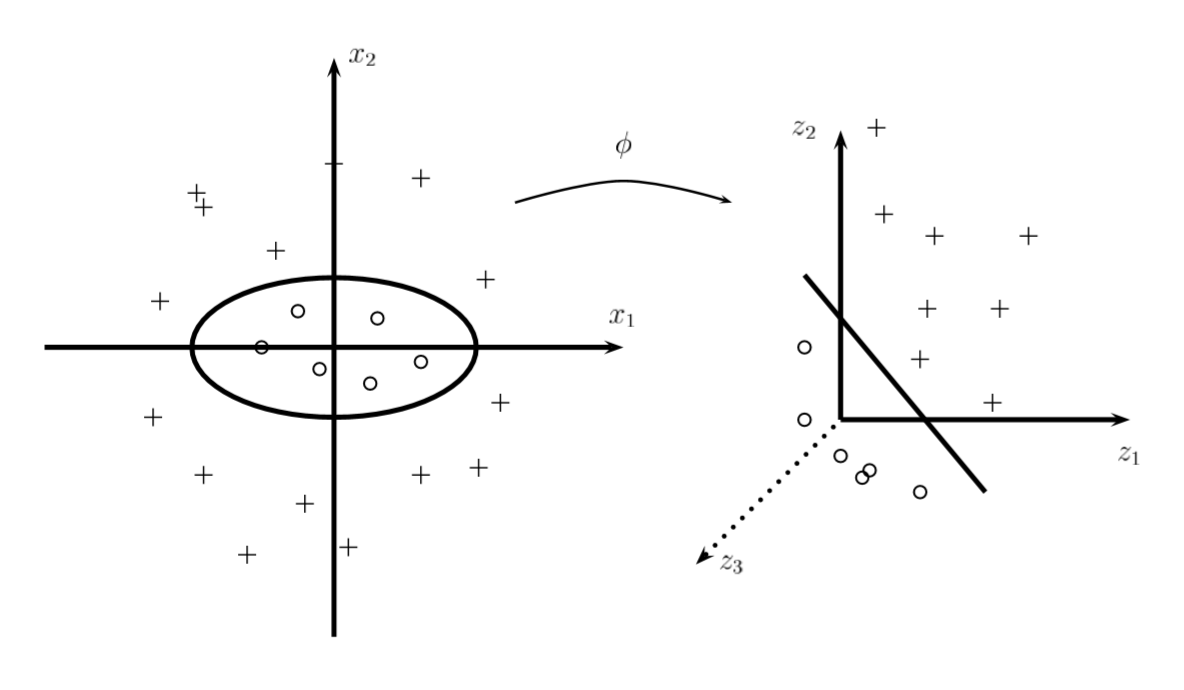

There is a potential drawback.  If we significantly expand the dimension of the problem, we might increase the computational burden.  For example, if $x$ has dimension $d = 256$ and we wanted to use all fourth order terms, then $z = \phi(x)$ has dimension 183,181,376.  What saves us is two observations.  First, many classifiers do not require that we know the values of the individual points but, rather, just the inner product between pairs of points.  Second, notice in our example that the inner product in $\mathcal{Z}$ can be written

$$ 
\begin{align}
\langle z, \tilde{z} \rangle &= \langle \phi(x), \phi(\tilde{x}) \rangle \\
&= x_1^2 \tilde{x}_1^2 + 2 x_1 \tilde{x_1} x_2 \tilde{x}_2 + x_2^2 \tilde{x}_2^2 \\
&= ( \langle x, \tilde{x} \rangle )^2 \\
&\equiv K(x, \tilde{x})
\end{align}
$$

Thus, we can compute $\langle z, \tilde{z} \rangle$ without ever computing $Z_i = \phi(X_i)$.

To summarize, kernelization means finding a mapping $\phi: \mathcal{X} \rightarrow \mathcal{Z}$ such that:

1. $\mathcal{Z}$ has higher dimension that $\mathcal{X}$ and so leads to a richer set of classifiers.

2. The classifier only requires computing inner products.

3. There is a function $K$, called a kernel, such that $\langle \phi(x), \phi(\tilde{x}) \rangle = K(x, \tilde{x})$

Then, everywhere the term $\langle x, \tilde{x} \rangle$ appears in the algorithm, replace it with $K(x, \tilde{x})$.

In fact, we never need to construct the mapping $\phi$ at all.  We only need to specify a kernel $K(x, \tilde{x})$ that corresponds to $\langle \phi(x), \phi(\tilde{x}) \rangle$ for some $\phi$.  This raises an interesting question:  given a function of two variables $K(x, y)$, does exist a function $\phi(x)$ such that $K(x, y) = \langle \phi(x), \phi(\tilde{x}) \rangle$ ?  The answer is provided by **Mercer's theorem** which says, roughly, that if $K$ is positive definite -- meaning that

$$ \int \int K(x, y) f(x) f(y) dx dy \geq 0 $$

for square integrable functions $f$ -- then such a $\phi$ exists.  Examples of commonly used kernels are:

- polynomial: $K(x, \tilde{x}) = (\langle x, \tilde{x} \rangle + a)^r$
- sigmoid: $K(x, \tilde{x}) = \text{tanh} (a \langle x, \tilde{x} \rangle + b)$
- Gaussian: $K(x, \tilde{x}) = -\exp \left( - \Vert x - \tilde{x} \Vert^2 / (2 \sigma^2) \right)$

Let us now see how we can use this trick in LDA and in support vector machines.

Recall that the Fisher linear discriminant method replaces $X$ with $U = w^T X$ where $w$ is chosen to maximize the Rayleigh coefficient

$$ J(w) = \frac{w^T S_B w}{w^T S_W w} $$

where

$$ S_B = (\overline{X}_0 - \overline{X}_1)(\overline{X}_0 - \overline{X}_1)^T $$

and

$$ S_W = \left( \frac{(n_0 - 1) S_0}{(n_0 - 1) + (n_1 - 1)} \right) + \left( \frac{(n_1 - 1) S_1}{(n_0 - 1) + (n_1 - 1)} \right) $$

In the kernelized version, we replace $X_i$ with $Z_i = \phi(X_i)$ and find $w$ to maximize

$$ J(w) = \frac{w^T S_B w}{w^T S_W w} $$

where

$$ S_B = (\overline{Z}_0 - \overline{Z}_1)(\overline{Z}_0 - \overline{Z}_1)^T $$

and

$$ S_W = \left( \frac{(n_0 - 1) \tilde{S}_0}{(n_0 - 1) + (n_1 - 1)} \right) + \left( \frac{(n_1 - 1) \tilde{S}_1}{(n_0 - 1) + (n_1 - 1)} \right) $$

Here, $\tilde{S}_j$ is the sample covariance of the $Z_i$'s for which $Y_i = j$.  However, to take advantage of kernelization, we need to reexpress this in terms of inner products and then replace the inner products with kernels.

It can be shown that the maximizing vector $w$ is a linear combination of the $Z_i$'s.  Then we can write

$$ w = \sum_{i=1}^n \alpha_i Z_i $$

Also,

$$ \overline{Z}_j = \frac{1}{n_j} \sum_{i=1}^n \phi(X_i) I(Y_i = j) $$

Therefore,

$$
\begin{align}
w^T \overline{Z}_j &= \left( \sum_{i=1}^n \alpha_i Z_i \right)^T \left( \frac{1}{n_j} \sum_{i=1}^n \phi(X_i) I(Y_i = j) \right) \\
&= \frac{1}{n_j} \sum_{i=1}^n \sum_{s=1}^n \alpha_i I(Y_s = j) Z_i^T Z_s \\
&= \frac{1}{n_j} \sum_{i=1}^n \alpha_i \sum_{s=1}^n I(Y_s = j) \phi(X_i)^T \phi(X_s) \\
&= \frac{1}{n_j} \sum_{i=1}^n \alpha_i \sum_{s=1}^n I(Y_s = j) K(X_i, X_s) \\
&= \alpha^T M_j
\end{align}
$$

where $M_j$ is a vector whose $i$-th component is

$$ M_j(i) = \frac{1}{n_j} \sum_{s=1}^n K(X_i, X_s) I(Y_s = j) $$

It follows that

$$ w^T \tilde{S}_B w = \alpha^T M \alpha $$

where $M = (M_0 - M_1)(M_0 - M_1)^T$.  By similar calculations, we can write

$$ w^T \tilde{S}_W w = \alpha^T N \alpha $$

where

$$ N = K_0\left( I - \frac{1}{n_0}\mathbf{1}\right) K_0^T + K_1\left( I - \frac{1}{n_1}\mathbf{1}\right) K_1^T$$

$I$ is the identity matrix, $\mathbf{1}$ is a matrix of all 1s, and $K_j$ is the $n \times n_j$ matrix with entries $(K_j)_{rs} = K(x_r, x_s)$ with $x_s$ varying over the observations in group $j$.  Hence, we now find $\alpha$ to maximize

$$ J(\alpha) = \frac{\alpha^T M \alpha}{\alpha^T N \alpha} $$

Notice that all the quantities are expressed in terms of the kernel.  Formally, the solution is $\alpha = N^{-1}(M_0 - M_1)$.  However, $N$ might be non-invertible.  In this case, one replaces $N$ by $N + bI$ for some constant $b$.  Finally, the projection onto the new subspace can be written as

$$ U = w^T \phi(x) = \sum_{i=1}^N \alpha_i K(x_i, x) $$

The support vector machine can be similarly kernelized.  We simply replace $\langle X_i, X_j \rangle$ with $K(X_i, X_j)$.  The hyperplane can be written as $\hat{H}(X) = \hat{\alpha}_0 + \sum_{i=1}^n \hat{\alpha}_i Y_i K(X, X_i)$.

### 23.11 Other Classifiers

There are many other classifiers and space precludes a full discussion of them.  Let us briefly mention a few.

The **k-nearest neighbors** classifier is very simple.  Given a point $x$, find the $k$ data points closest to $x$.  Classify $x$ using the majority vote of these $k$ neighbors.  Ties can be broken randomly; the parameter $k$ can be chosen by cross-validation.

**Bagging** is a method for reducing the variability of a classifier.  It is most helpful for highly non-linear classifiers such as a tree.  We draw $B$ bootstrap samples from the data.  The $b$-th bootstrap sample yields a classifier $h_b$.  The final classifier is

$$ 
\hat{x} = \begin{cases}
1 & \text{if } \frac{1}{B} \sum_{b=1}^B h_b(x) \geq \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

**Boosting** is a method for starting with a simple classifier and gradually improving it by refitting the data giving higher weight to misclassified samples.  Suppose that $\mathcal{H}$ is a collection of classifiers, for example, trees with only one split.  Assume that $Y_i \in \{ -1, 1 \}$ and that each tree classifier $h$ is such that $h(x) \in \{ -1, 1 \}$.  We usually give equal weight to all data points in the methods we have discussed.  But one can incorporate unequal weights quite easily in most algorithms.  For example, in constructing a tree, we could replace the impurity measure with a weighted impurity measure.  The original version of boosting, called AdaBoost, is as follows.

1. Set the weights $w_i = 1 / n$, $i = 1, \dots, n$.

2. For $j = 1, \dots, J$, do the following steps:

    (a) Construct a classifier $h_J$ from the data using weights $w_1, \dots, w_n$.
    
    (b) Compute the weighted error estimate:
    
    $$ \hat{L}_j = \frac{\sum_{i=1}^n w_i I(Y_i \neq h_j(X_i) }{\sum_{i=1}^n w_i} $$
    
    (c) Let $\alpha_j = \log (( 1 - \hat{L}_j) / \hat{L}_j)$
    
    (d) Update the weights:
    
    $$ w_i \leftarrow w_i e^{\alpha_j I(Y_i \neq h_j(X_i)} $$
    
3. The final classifier is

    $$ \hat{h}(x) = \text{sign} \left( \sum_{j=1}^J \alpha_j h_j(x) \right) $$
    
There is an enormous literature trying to explain and improve on boosting.  Whereas bagging is a variance reduction technique,  boosting can be thought of as a bias reduction technique.  We starting with a simple -- and hence highly biased -- classifier, and we gradually reduce the bias.  The disadvantage of boosting is that the  final classifier is quite complicated.

### 23.13 Exercises

**Exercise 23.13.1**.  Prove Theorem 23.5.

The Bayes rule is optimal, that is, if $h$ is any classification rule then $L(h^*) \leq L(h)$.

**Solution**.